#                                        Restaurant Rating Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset


In [2]:
df = pd.read_csv("zomato.csv")
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


# Data Analysis

In [3]:
df.head() # prints the first 5 rows of a DataFrame

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.columns # give name of all the columns in the dataset 

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.shape # give number of rows and columns

(51717, 17)

- there are total 51717 samples with 17 features.

In [6]:
df.info() # Looking at the information about the dataset, datatypes of the coresponding columns and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
df.describe() #statistic description

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


# Data Cleaning or EDA (Exploratory Data Analysis)
##### Data Cleaning:
1. Deleting redundant columns.
2. Renaming the columns.
3. Dropping duplicates.
4. Cleaning individual columns.
5. Remove the NaN values from the dataset
6. Some Transformations

##### Null Value Analysis

In [8]:
df.isnull().sum() # give number of missing values variables have.

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

- there are so many null values.we can clearly see that in the  '__rate__', '__phone__', '__location__', '__rest_type__', '__dish_liked__', '__cuisines__' and '__approx_cost(for two people)__' these columns have missing values.So  firstly we have to handle the missing values.

In [9]:
# to get name of columns with null values more than 0

[features for features in df.columns if df[features].isnull().sum()>0] 

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

##### Deleting Unnnecessary Columns

In [10]:
#Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "data"

data=df.drop(['url','phone','location','reviews_list','rest_type'],axis=1) 
data.head() # looking at the dataset after transformation 

,address,name,online_order,book_table,rate,votes,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


##### Removing the Duplicates

In [11]:
# Calculate the number of duplicated rows in the DataFrame 'data' and return the sum
data.duplicated().sum() 

66

In [12]:
# Drop the duplicate rows from the DataFrame 'data' and modify it in place
data.drop_duplicates(inplace=True) 
data.duplicated().sum()

0

##### Remove the NaN values from the dataset

In [13]:
# Drop rows with any null values from the DataFrame 'data' and modify it in place
data.dropna(inplace=True) 

data.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

- Now there is no null value

##### Changing The Columns Names

In [14]:
data = data.rename(columns={'name':'Name',
        'address':'Address',
        'online_order':"Delivery",
        'book_table':"Booking", 
        'rate':"Rating",
        'cuisines':"Cuisines", 
        'approx_cost(for two people)':"Cost", 
        'listed_in(type)':"Type",
        'listed_in(city)':"City"})
data.columns

Index(['Address', 'Name', 'Delivery', 'Booking', 'Rating', 'votes',
       'dish_liked', 'Cuisines', 'Cost', 'menu_item', 'Type', 'City'],
      dtype='object')

##### Cleaning the "cost" column

In [15]:
data['Cost'].unique() # gives unique values in cost column

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

- here we can see that data point is string type and some values like 1,200, ,2,500, 5,000 6,000 etc have commas(,). we have  to remove that ',' from the values and we have convert them into numeric type.

In [16]:
data['Cost'] = data['Cost'].astype(str)
data['Cost'] = data['Cost'].apply(lambda x: x.replace(',','.'))
data['Cost'] = data['Cost'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23441 entries, 0 to 51715
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     23441 non-null  object 
 1   Name        23441 non-null  object 
 2   Delivery    23441 non-null  object 
 3   Booking     23441 non-null  object 
 4   Rating      23441 non-null  object 
 5   votes       23441 non-null  int64  
 6   dish_liked  23441 non-null  object 
 7   Cuisines    23441 non-null  object 
 8   Cost        23441 non-null  float64
 9   menu_item   23441 non-null  object 
 10  Type        23441 non-null  object 
 11  City        23441 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.3+ MB


In [17]:
data['Cost'].unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 750.  , 200.  , 850.  ,   1.2 , 150.  , 350.  , 250.  ,
         1.5 ,   1.3 ,   1.  , 100.  , 900.  ,   1.1 ,   1.6 , 950.  ,
       230.  ,   1.7 ,   1.4 ,   1.35,   2.2 ,   2.  ,   1.8 ,   1.9 ,
       180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,   3.4 ,  40.  ,
         1.25,   3.5 ,   4.  ,   2.4 ,   1.45,   3.2 ,   6.  ,   1.05,
         4.1 ,   2.3 , 120.  ,   2.6 ,   5.  ,   3.7 ,   1.65,   2.7 ,
         4.5 ])

- Now sucessfully we converted the values into numeric type

##### Handling the 'Rating' column

In [18]:
# dropping new restaurant where rating is not available
# dropping restaurants where no of votes for rating are less then 50

data=data[-data["Rating"].isna()]
data=data[data["votes"]>=50]

'''dropping votes features as it will not be available for future data on which
   prediction is to be made'''

df.drop("votes",axis=1,inplace=True)

In [19]:
data['Rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.2/5', '4.5/5', '2.5/5', '2.9/5', '3.4/5',
       '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5', '3.9 /5',
       '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '3.8 /5', '2.7 /5',
       '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5', '4.9/5', '2.1/5',
       '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5', '4.6 /5', '4.9 /5',
       '2.8 /5', '2.5 /5', '3.2 /5', '3.0 /5', '3.5 /5', '3.1 /5',
       '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5', '2.2 /5',
       '2.0 /5', '1.8 /5'], dtype=object)

- here rating column also string type. we have to convert them into numeric type. we have to remove the '/5' from given values. there is 'NEW' and - value which makes no sense. So, we have to remove that value.

In [20]:
data=data.loc[data.Rating != 'NEW'] # geting rid of 'NEW'

In [21]:
data['Rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.2/5', '4.5/5', '2.5/5', '2.9/5', '3.4/5',
       '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5', '3.9 /5',
       '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '3.8 /5', '2.7 /5',
       '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5', '4.9/5', '2.1/5',
       '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5', '4.6 /5', '4.9 /5',
       '2.8 /5', '2.5 /5', '3.2 /5', '3.0 /5', '3.5 /5', '3.1 /5',
       '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5', '2.2 /5',
       '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
data= data.loc[data.Rating != '-']

In [23]:
data['Rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.2/5', '4.5/5', '2.5/5', '2.9/5', '3.4/5',
       '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5', '3.9 /5',
       '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '3.8 /5', '2.7 /5',
       '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5', '4.9/5', '2.1/5',
       '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5', '4.6 /5', '4.9 /5',
       '2.8 /5', '2.5 /5', '3.2 /5', '3.0 /5', '3.5 /5', '3.1 /5',
       '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5', '2.2 /5',
       '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
data['Rating'] = data['Rating'].apply(lambda x:x.replace('/5', ''))

data['Rating'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.2', '4.5',
       '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '3.8 ', '2.7 ', '2.6 ',
       '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '3.4 ',
       '3.6 ', '3.3 ', '4.6 ', '4.9 ', '2.8 ', '2.5 ', '3.2 ', '3.0 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [25]:
data['Rating'] = data['Rating'].apply(lambda x: float(x))
data['Rating']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51705    3.8
51707    3.9
51708    2.8
51711    2.5
51715    4.3
Name: Rating, Length: 21929, dtype: float64

In [26]:
data.head()

,Address,Name,Delivery,Booking,Rating,votes,dish_liked,Cuisines,Cost,menu_item,Type,City
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari


# Data  Visualization

##### Most famous restaurant chains in banaglore

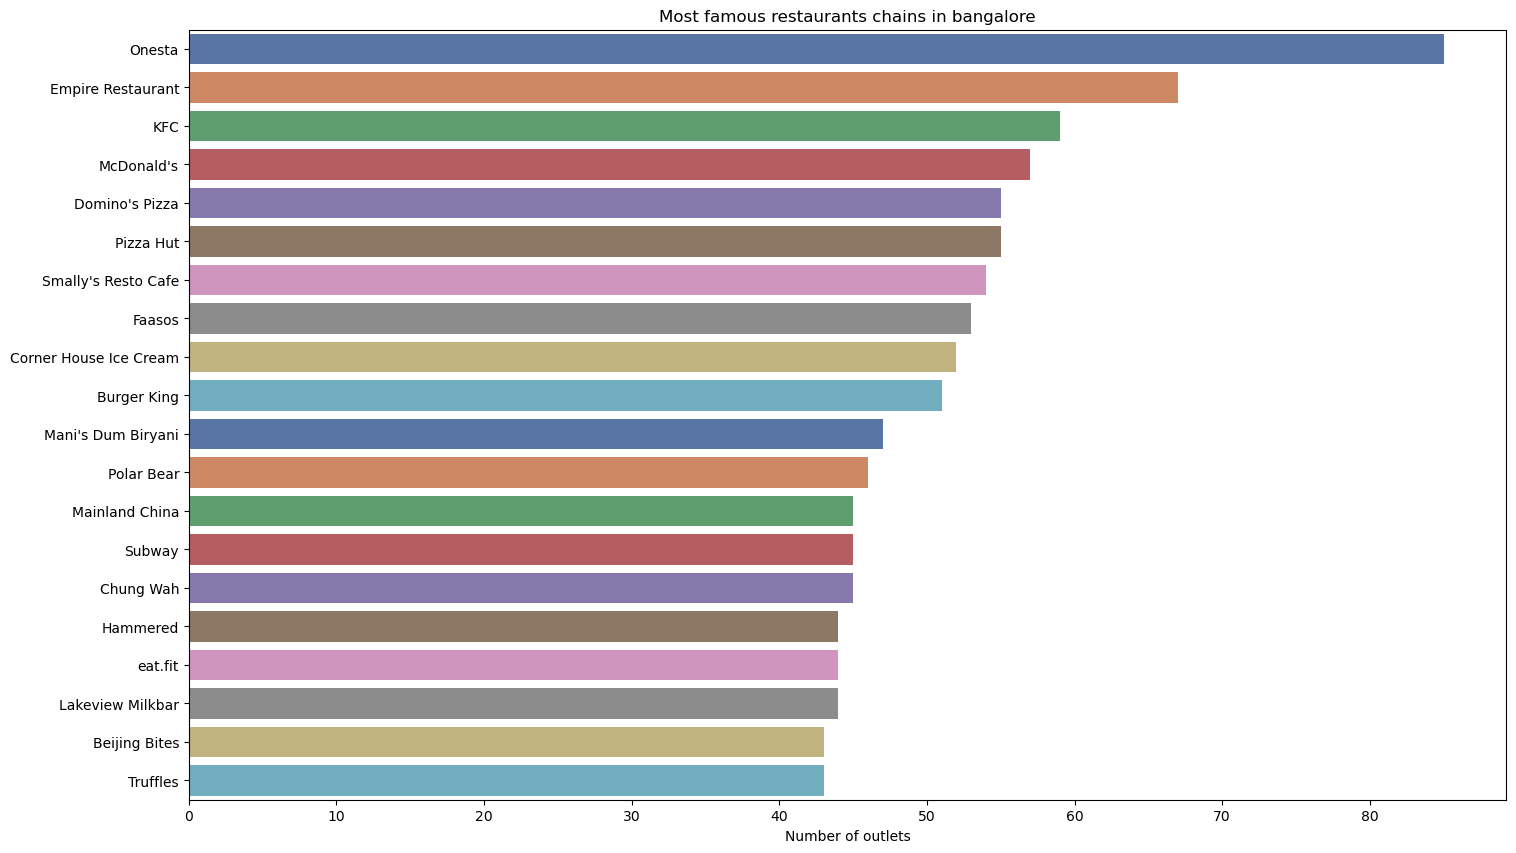

In [27]:
plt.figure(figsize = (17,10))
chains = data['Name'].value_counts()[:20]
sns.barplot(x = chains, y=  chains.index,  palette= 'deep')
plt.title('Most famous restaurants chains in bangalore')
plt.xlabel('Number of outlets')
plt.show()

Insights:

- __'Onesta'__, __'Empire Restaurant'__ & __'Cafe Coffee Day'__  are the most famous restaurant in bangalore.

##### Rating Distribution

Text(0.5, 1.0, 'Rating Distribution')

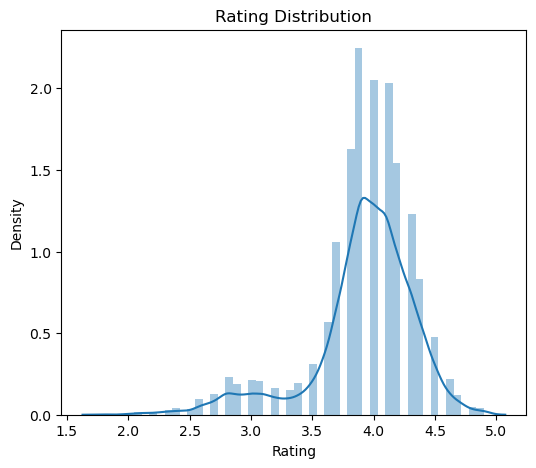

In [28]:
plt.figure(figsize = (6,5))
sns.distplot(data["Rating"])
plt.title('Rating Distribution')

__Insight:__

- We can infer from above that most of the ratings are within 3.0 and 4.5

##### Restaurant Types

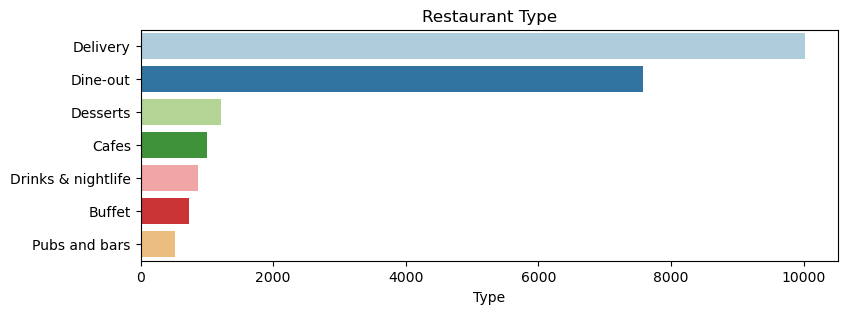

In [29]:
plt.figure(figsize = (9,3))
t = data['Type'].value_counts()
sns.barplot(y = t.index ,x = t, palette = 'Paired')
plt.title('Restaurant Type')
plt.show()

__Insight:__

- 'Delivery', 'Dine-out', 'Desserts' are the most common types of  restaurant.
- "Pubs and bars ","Buffet", 'Drinks&nightlife' are the least common. 

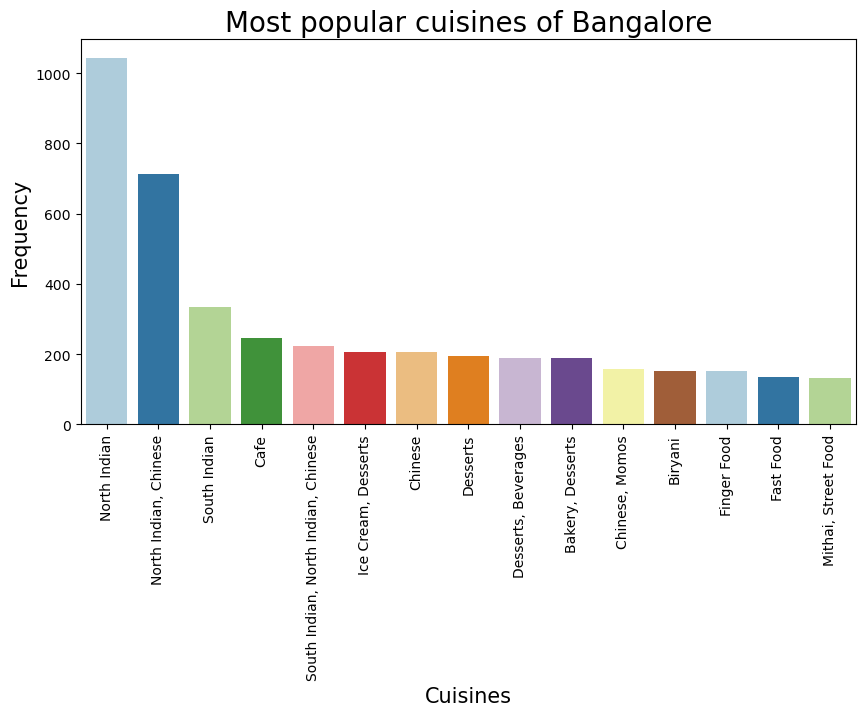

In [30]:
v = data['Cuisines'].value_counts()[:15]
plt.figure(figsize = (10,5))

ax  = sns.barplot(x = v.index, y = v, palette = 'Paired')

plt.title('Most popular cuisines of Bangalore', fontsize = 20)
plt.xlabel('Cuisines', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation =90)
plt.show()

Insights:

- Here from above we can see that __'North Indian Cuisines'__ are most famous in Bangalore restaurants.

#####  Distribution of Cost of Food for two People


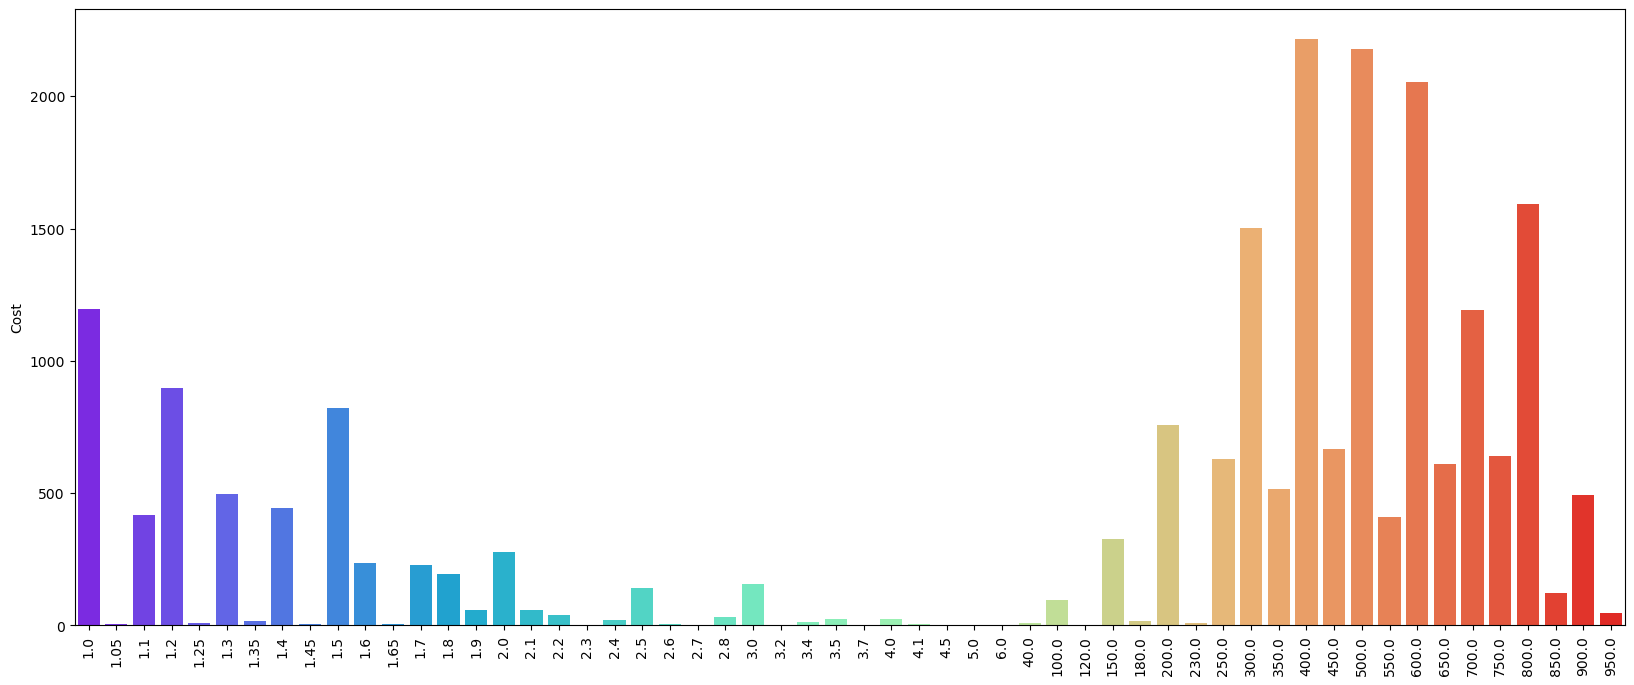

In [31]:
#contains the approximate cost of meal for two people
v = data['Cost'].value_counts()
plt.figure(figsize = (20,8))

sns.barplot(x = v.index, y = v, palette = 'rainbow')
plt.xticks(rotation=90)
plt.show()

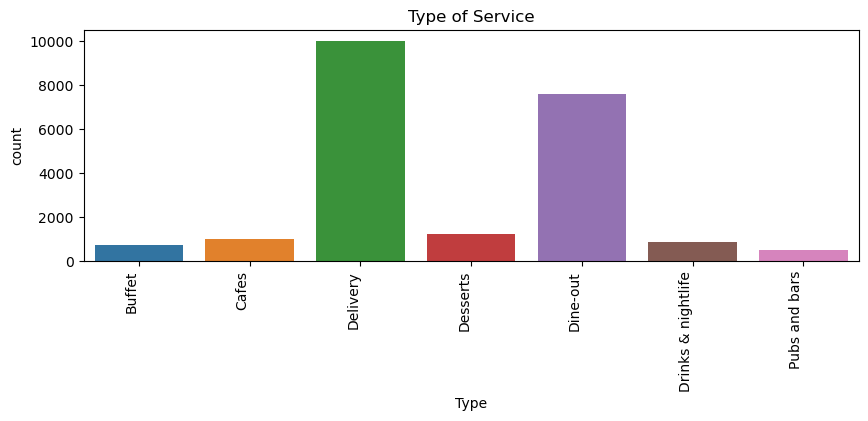

In [32]:
#Types of Services

ax  = sns.countplot(data['Type']).set_xticklabels(sns.countplot(data['Type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,3)

plt.title('Type of Service')
plt.show()

Insights:

Here the two main service types are Delivery and Dine-out.

In [34]:
# Define the function to categorize ratings
def r_category(rating):
    if rating >= 4.0:
        return 'Excellent'
    elif rating >= 3.5:
        return 'Good'
    elif rating >= 3.0:
        return 'Average'
    else:
        return 'Poor'

# Define the function to categorize price per person
def p_category(price):
    if price<=100.0:
        return "Cheap"
    elif price<=250.0:
        return "Resonable"
    elif price<=500.0:
        return "Affordable"
    else:
        return "Expensive"

In [35]:
#deriving features

data['Cost_Per_Person'] = data['Cost'] / 2
data['Rating'] = data['Rating'].astype(float)
data['Category'] = data['Rating'].apply(r_category)
data['Price_Category'] = data['Cost_Per_Person'].apply(p_category)

# whether menu is available or not

data["Menu"]=data["menu_item"].map(lambda x: "No" if x=='[]' else "Yes")

#no of dishes liked by customer at a restaurant

data['dish_liked']=data['dish_liked'].map(lambda x:0 if x=="" else len(x.split(", ")))

# No of varieties served at a restaurant

data['No_of_Varieties']=data['Cuisines'].apply(lambda x:len(x.split(", ")))

In [36]:
change={'dish_liked':"No_of_Best_Sellers"}
data.rename(columns=change,inplace=True)

In [37]:
data.reset_index(drop=True,inplace=True)

In [38]:
df=data[['Name','Address','Menu','Delivery', 'Booking', 'No_of_Best_Sellers', 'No_of_Varieties', 'Cuisines',
     'Cost_Per_Person', 'Type', 'City', 'Rating','Category','Price_Category']]
df.head()

,Name,Address,Menu,Delivery,Booking,No_of_Best_Sellers,No_of_Varieties,Cuisines,Cost_Per_Person,Type,City,Rating,Category,Price_Category
0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",No,Yes,Yes,7,3,"North Indian, Mughlai, Chinese",400.0,Buffet,Banashankari,4.1,Excellent,Affordable
1,Spice Elephant,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",No,Yes,No,7,3,"Chinese, North Indian, Thai",400.0,Buffet,Banashankari,4.1,Excellent,Affordable
2,San Churro Cafe,"1112, Next to KIMS Medical College, 17th Cross...",No,Yes,No,7,3,"Cafe, Mexican, Italian",400.0,Buffet,Banashankari,3.8,Good,Affordable
3,Addhuri Udupi Bhojana,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,No,1,2,"South Indian, North Indian",150.0,Buffet,Banashankari,3.7,Good,Resonable
4,Grand Village,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,No,2,2,"North Indian, Rajasthani",300.0,Buffet,Banashankari,3.8,Good,Affordable


In [39]:
#cleaning cuisine columns by properly categorizing food items

def func1(string):
    l=string.split(", ")
    
    if "Afghan" in l:
        l=list(map(lambda x: x.replace('Afghan', 'Afghani'), l))
        
    if "Bubble Tea" in l:
        l=list(map(lambda x: x.replace('Bubble Tea', 'Beverages'), l))
        
    if "Coffee" in l:
        l=list(map(lambda x: x.replace('Coffee', 'Beverages'), l))
        
    if "Cafe" in l:
        l=list(map(lambda x: x.replace('Cafe', 'Beverages'), l))
       
    if "Tea" in l:
        l=list(map(lambda x: x.replace('Tea', 'Beverages'), l))
        
    if "Bubble Beverages" in l:
        l=list(map(lambda x: x.replace('Bubble Beverages', 'Beverages'), l))
       
    if "Ice Cream" in l:
        l=list(map(lambda x: x.replace('Ice Cream', 'Desserts'), l))
        
    if "Mithai" in l:
        l=list(map(lambda x: x.replace('Mithai', 'Desserts'), l))
      
    if "Bar Food" in l:
        l=list(map(lambda x: x.replace('Bar Food', 'Fast Food'), l))
        
    if "Burger" in l:
        l=list(map(lambda x: x.replace('Burger', 'Fast Food'), l))
       
    if "Finger Food" in l:
        l=list(map(lambda x: x.replace('Finger Food', 'Fast Food'), l))
        
    if "Momos" in l:
        l=list(map(lambda x: x.replace('Momos', 'Fast Food'), l))
        
    if "Rolls" in l:
        l=list(map(lambda x: x.replace('Rolls', 'Fast Food'), l))
    
    if "Wraps" in l:
        l=list(map(lambda x: x.replace('Wraps', 'Fast Food'), l))
        
    if "Street Food" in l:
        l=list(map(lambda x: x.replace('Street Food', 'Fast Food'), l))
 
    if "Juices" in l:
        l=list(map(lambda x: x.replace('Juices', 'Healthy Food'), l))
       
    if "Salad" in l:
        l=list(map(lambda x: x.replace('Salad', 'Healthy Food'), l))
     
    if "Sandwich" in l:
        l=list(map(lambda x: x.replace('Sandwich', 'Healthy Food'), l))
      
    if "Grill" in l:
        l=list(map(lambda x: x.replace('Grill', 'BBQ'), l))
    
    if "Steak" in l:
        l=list(map(lambda x: x.replace('Steak', 'BBQ'), l))
        
    if "Sushi" in l:
        l=list(map(lambda x: x.replace('Sushi', 'Japanese'), l))
        
    if "Tex-Mex" in l:
        l=list(map(lambda x: x.replace('Tex-Mex', 'Mexican'), l))
        
    if "Roast Chicken" in l:
        l=list(map(lambda x: x.replace('Roast Chicken', 'Chinese'), l))
        
    if "Charcoal Chicken" in l:
        l=list(map(lambda x: x.replace('Charcoal Chicken', 'Chinese'), l))
        
    if "Pizza" in l:
        l=list(map(lambda x: x.replace('Pizza', 'Italian'), l))
        
    if "Biryani" in l:
        l=list(map(lambda x: x.replace('Biryani', 'South Indian'), l))
        
    if "Kebab" in l:
        l=list(map(lambda x: x.replace('Kebab', 'North Indian'), l))
    
    return ", ".join(set(l))
    
df["Cuisines"]=df["Cuisines"].apply(func1)

# Data Preprocessing

In [40]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [41]:
multi_label=df["Cuisines"].str.split(", ")

In [42]:
mlb = MultiLabelBinarizer()
inter_data=mlb.fit_transform(multi_label)
multi_label_df=pd.DataFrame(inter_data,columns=mlb.classes_)

In [43]:
data=df[['Name','Menu','Delivery', 'Booking','Type', 'City','No_of_Best_Sellers', 'No_of_Varieties',
         'Cost_Per_Person', 'Rating','Category','Price_Category']]
dataframe=pd.concat([data,multi_label_df],axis=1)
dataframe.head()

,Name,Menu,Delivery,Booking,Type,City,No_of_Best_Sellers,No_of_Varieties,Cost_Per_Person,Rating,...,Singaporean,South American,South Indian,Spanish,Sri Lankan,Thai,Tibetan,Turkish,Vegan,Vietnamese
0,Jalsa,No,Yes,Yes,Buffet,Banashankari,7,3,400.0,4.1,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,No,Yes,No,Buffet,Banashankari,7,3,400.0,4.1,...,0,0,0,0,0,1,0,0,0,0
2,San Churro Cafe,No,Yes,No,Buffet,Banashankari,7,3,400.0,3.8,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,No,No,No,Buffet,Banashankari,1,2,150.0,3.7,...,0,0,1,0,0,0,0,0,0,0
4,Grand Village,No,No,No,Buffet,Banashankari,2,2,300.0,3.8,...,0,0,0,0,0,0,0,0,0,0


In [44]:
dataframe.to_csv("display.csv",index=False)

In [45]:
d=df[['Name','Address','Menu','Delivery', 'Booking','Type', 'City','No_of_Best_Sellers', 'No_of_Varieties',
      'Cost_Per_Person', 'Rating','Category','Price_Category']]
dataframe=pd.concat([d,multi_label_df],axis=1)

In [46]:
dataframe.duplicated(subset=['Name','Address']).sum()

17605

In [48]:
dataframe.drop_duplicates(subset=['Name','Address'],inplace=True)
len(dataframe)

4324

In [49]:
one_hot=dataframe[['Delivery', 'Booking', 'City']]
numeric=dataframe[['No_of_Best_Sellers', 'No_of_Varieties', 'Cost_Per_Person', 'Rating']]

In [50]:
encoder= OneHotEncoder()
one_hot_df=pd.DataFrame(encoder.fit_transform(one_hot).toarray(),index=list(dataframe.index))

In [51]:
df_inter=pd.concat([numeric,multi_label_df.iloc[list(dataframe.index),:],one_hot_df],axis=1)
df_inter.reset_index(drop=True,inplace=True)
df_inter.head()

,No_of_Best_Sellers,No_of_Varieties,Cost_Per_Person,Rating,Afghani,African,American,Andhra,Arabian,Asian,...,24,25,26,27,28,29,30,31,32,33
0,7,3,400.0,4.1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,3,400.0,4.1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,3,400.0,3.8,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2,150.0,3.7,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2,300.0,3.8,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
X=df_inter.drop("Rating",axis=1).values
y=df_inter["Rating"].values

In [53]:
mlb.classes_

array(['Afghani', 'African', 'American', 'Andhra', 'Arabian', 'Asian',
       'Assamese', 'Awadhi', 'BBQ', 'Bakery', 'Belgian', 'Bengali',
       'Beverages', 'Bihari', 'Bohri', 'British', 'Burmese', 'Cantonese',
       'Chettinad', 'Chinese', 'Continental', 'Desserts', 'European',
       'Fast Food', 'French', 'German', 'Goan', 'Greek', 'Gujarati',
       'Healthy Food', 'Hyderabadi', 'Indonesian', 'Iranian', 'Italian',
       'Japanese', 'Jewish', 'Kashmiri', 'Kerala', 'Konkan', 'Korean',
       'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malaysian',
       'Mangalorean', 'Mediterranean', 'Mexican', 'Middle Eastern',
       'Modern Indian', 'Mughlai', 'Naga', 'Nepalese', 'North Eastern',
       'North Indian', 'Oriya', 'Parsi', 'Portuguese', 'Rajasthani',
       'Russian', 'Seafood', 'Sindhi', 'Singaporean', 'South American',
       'South Indian', 'Spanish', 'Sri Lankan', 'Thai', 'Tibetan',
       'Turkish', 'Vegan', 'Vietnamese'], dtype=object)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model
model = lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.16341514918478012


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.16341514918478012
Root Mean Squared Error (RMSE): 0.4042463966255978
Mean Absolute Error (MAE): 0.2853353749151192
R-squared (R2) Score: 0.2784483482102552


In [64]:
import joblib

joblib.dump(model,'model.pkl')
joblib.dump(mlb,'mlb.pkl')
joblib.dump(encoder,'encoder.pkl')

['encoder.pkl']